The <a href = "https://www.kaggle.com/olistbr/brazilian-ecommerce">Olist</a> Database


<img src = 'https://i.imgur.com/HRhd2Y0.png'>

In [114]:
# importando bibliotecas

import missingno as mn
import pandas as pd
import numpy as np

In [115]:
#importando datasets

df_customers = pd.read_csv('../datasets/olist_customers_dataset.csv')
df_items = pd.read_csv('../datasets/olist_order_items_dataset.csv')
df_payments = pd.read_csv("../datasets/olist_order_payments_dataset.csv")
df_reviews = pd.read_csv("../datasets/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("../datasets/olist_orders_dataset.csv")
df_products = pd.read_csv("../datasets/olist_products_dataset.csv")
df_sellers = pd.read_csv("../datasets/olist_sellers_dataset.csv")
df_category = pd.read_csv("../datasets/product_category_name_translation.csv")

In [116]:
#customer data
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [117]:
df_customers.shape

(99441, 5)

In [118]:
df_customers['customer_id'].nunique()

99441

In [119]:
df_customers['customer_unique_id'].nunique()

96096

In [120]:
#order items data
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [121]:
#payments data
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [122]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [123]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [124]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Customer dataframe

In [125]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<AxesSubplot:>

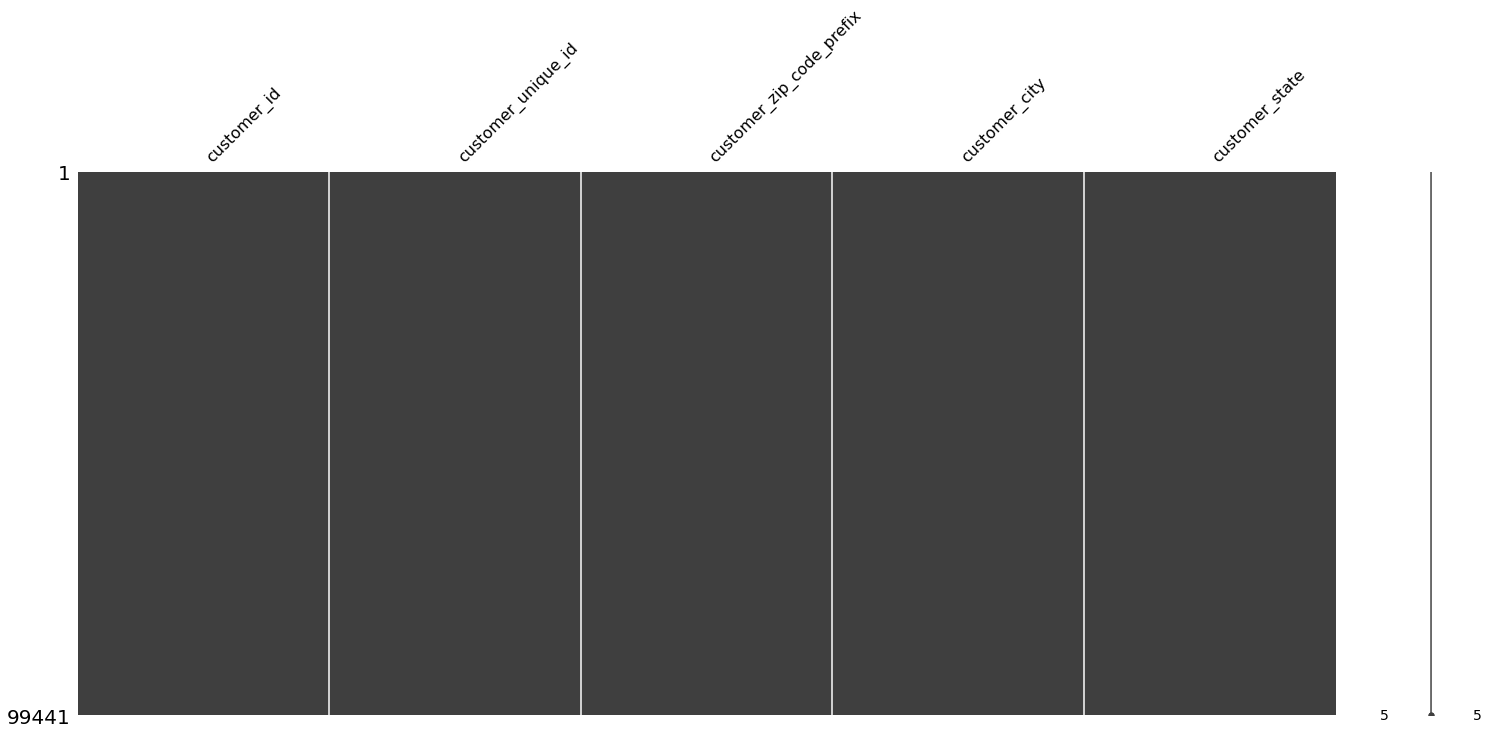

In [126]:
# verificando nulos
mn.matrix(df_customers)

In [127]:
df_customers.isnull().sum()/len(df_orders)*100

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

Sem valores nulos neste dataframe.

In [128]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Não vamos utilizar a coluna `zip code` em nosso projeto, portanto vamos excluí-la.
#### Code:

In [129]:
df_customers.drop('customer_zip_code_prefix', axis = 1, inplace = True)

#### Check:

In [130]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state'], dtype='object')

### Items dataframe

In [131]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<AxesSubplot:>

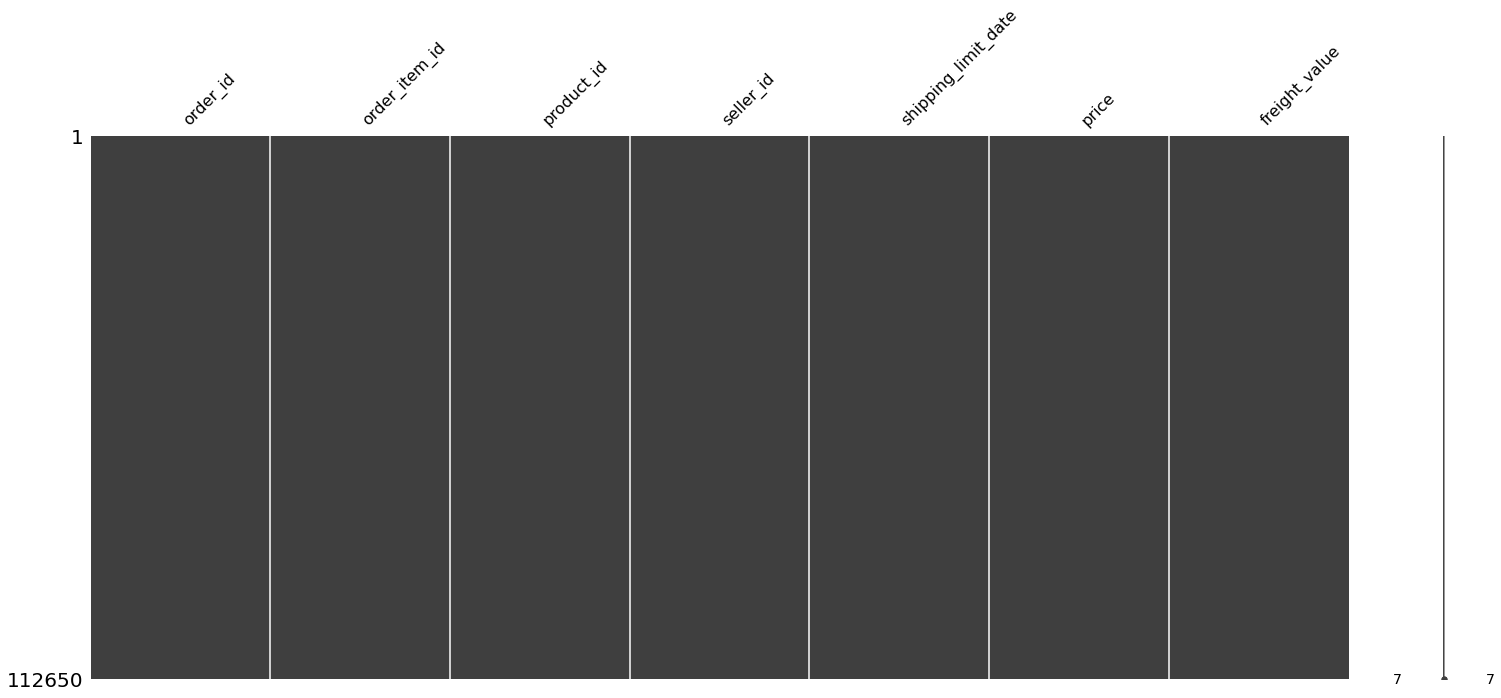

In [132]:
#checando nulos
mn.matrix(df_items)

In [133]:
df_items.isnull().sum()/len(df_orders)*100

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [134]:
df_items.isnull().values.any()

False

Não há valores nulos neste dataframe

In [135]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [136]:
items = df_items.groupby(['order_id', 'product_id', 'seller_id', 'shipping_limit_date'], as_index = False).agg({
    'price': "sum",
    'freight_value': "sum"})
items.head()

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [137]:
items.shape

(102425, 6)

### Payments dataframe

In [138]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [139]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [140]:
df_payments.isnull().values.any()

False

In [141]:
df_payments.duplicated().any()

False

### Reviews dataframe

In [142]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [143]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [144]:
#drop unnecessary columns:

cols = ['review_id', 'review_creation_date', 'review_answer_timestamp', 'review_comment_title', 'review_comment_message']

df_reviews.drop(columns=cols, axis = 1, inplace = True)
df_reviews.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [145]:
df_reviews.isnull().values.any()

False

In [146]:
df_reviews.review_score.value_counts(dropna = False)

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [147]:
df_reviews[df_reviews['order_id'].duplicated()]

,order_id,review_score
1128,5040757d4e06a4be96d3827b860b4e7c,5
3127,cf73e2cb1f4a9480ed70c154da3d954a,5
8164,e1bc1083cd7acd30d0576335373b907d,5
9128,c7cfea0c153e6382e32e84c2a9dd7d2e,5
9868,f9c78e6e58306dc81efbbada1ac11f24,3
...,...,...
99762,c0db7d31ace61fc360a3eaa34dd3457c,5
99883,42ae1967f68c90bb325783ac55d761ce,4
99939,c5334d330e36d2a810a7a13c72e135ee,5
99953,a7dbcf5043158d6fa72859eead2f3d10,4


In [148]:
df_reviews[df_reviews['order_id'] == 'c0db7d31ace61fc360a3eaa34dd3457c']

,order_id,review_score
68238,c0db7d31ace61fc360a3eaa34dd3457c,5
99762,c0db7d31ace61fc360a3eaa34dd3457c,5


In [149]:
df_reviews.shape

(100000, 2)

In [152]:
df_reviews = df_reviews.groupby('order_id')['review_score'].max().reset_index()
df_reviews[df_reviews['order_id'].duplicated()]

,order_id,review_score


### Orders dataframe

In [64]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<AxesSubplot:>

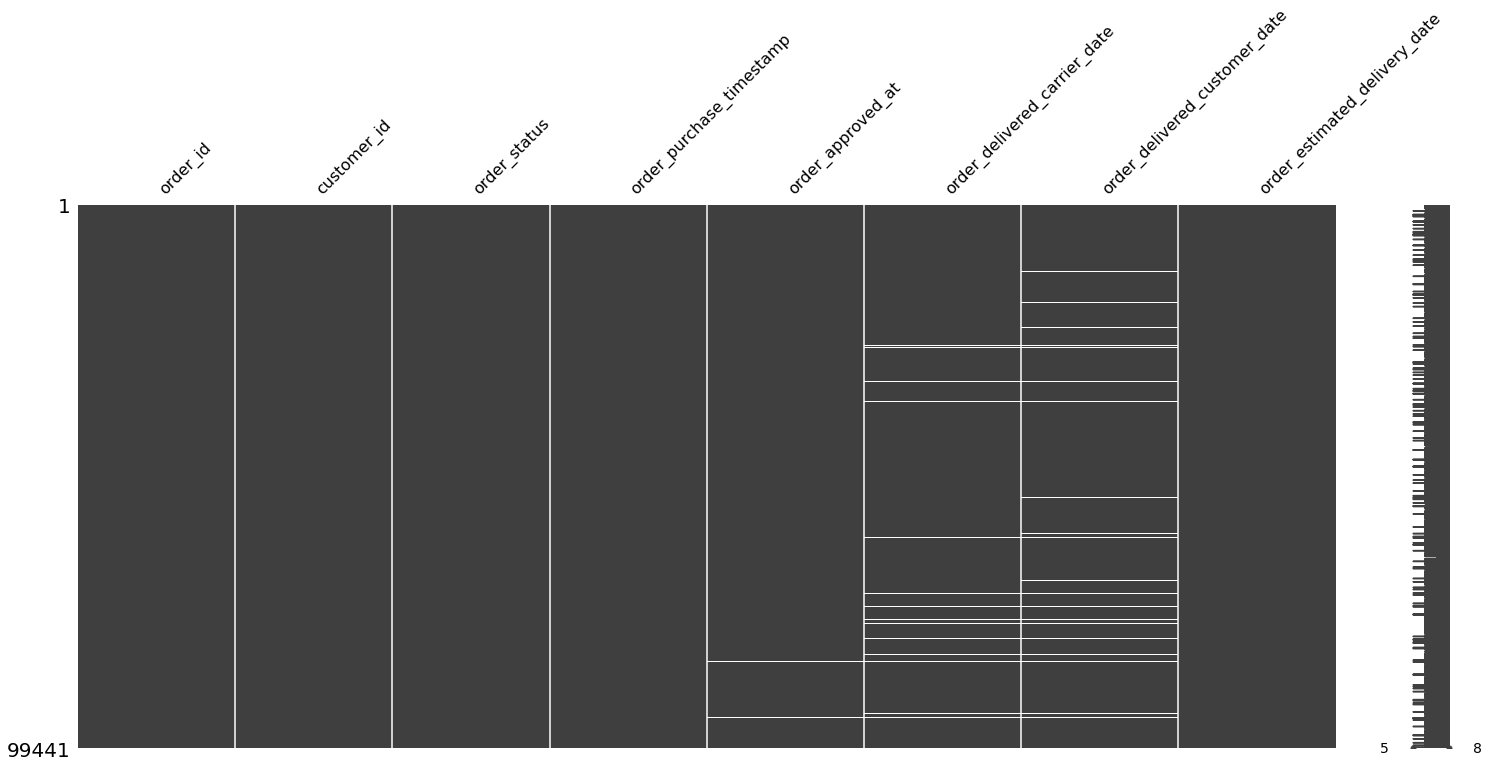

In [65]:
#checking valores nulos
mn.matrix(df_orders)

In [66]:
df_orders.isnull().sum()/len(df_orders)*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [67]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Vamos checar somente os pedidos que foram entregues, que são os que nos interessam.

In [68]:
df_orders_del = df_orders[df_orders['order_status'] == "delivered"]

In [69]:
df_orders_del.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [70]:
df_orders_del.dropna(axis = 0, inplace = True)

<ipython-input-70-abde385e6fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_del.dropna(axis = 0, inplace = True)


In [71]:
df_orders_del.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [72]:
df_orders_del.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [73]:
df_orders_del.isnull().values.any()

False

In [74]:
df_orders_del.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [84]:
df_orders_del.duplicated().any()

False

### Products dataframe

In [75]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Só precisamos da coluna com nome da categoria. Vamos apagar o restante.

In [76]:
df_products = df_products[['product_id', 'product_category_name', 'product_photos_qty']]
df_products.head()

,product_id,product_category_name,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0


<AxesSubplot:>

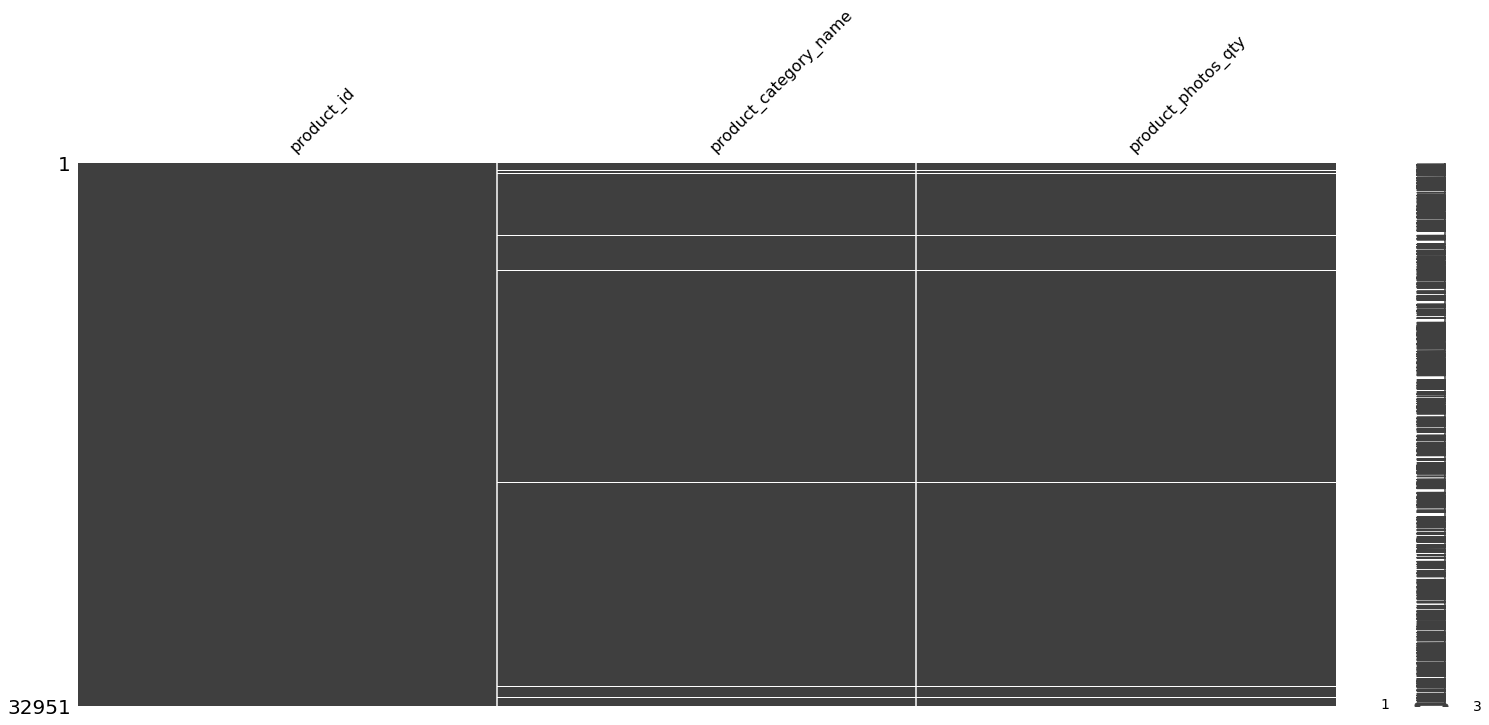

In [77]:
#checando nulos:
mn.matrix(df_products)

Vamos preencher os valores nulos da seguinte forma:
- na coluna de categroia colocaremos `no_info`
- na coluna de quantidade de fotos colocaremos o valor 0

**Code:**

In [78]:
df_products.loc[:, 'product_category_name'] = df_products.loc[:, 'product_category_name'].fillna(value='no info')

**Test:**

<AxesSubplot:>

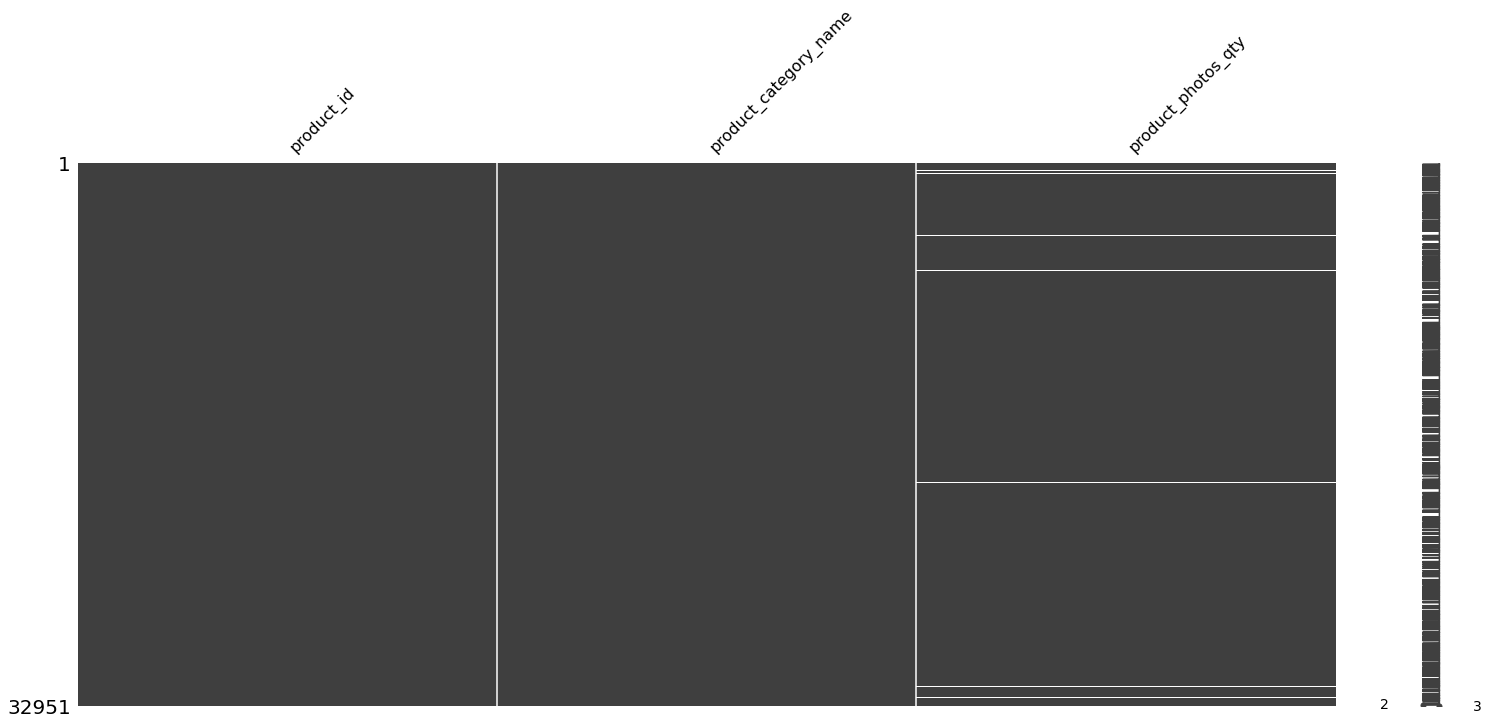

In [79]:
mn.matrix(df_products)

In [80]:
df_products.isnull().values.any()

True

In [81]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_photos_qty     32341 non-null  float64
dtypes: float64(1), object(2)
memory usage: 772.4+ KB


### Seller dataframe

In [82]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [83]:
df_sellers = df_sellers[['seller_id', 'seller_state']]
df_sellers.head()

,seller_id,seller_state
0,3442f8959a84dea7ee197c632cb2df15,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,SP


# Union dataframes

The order dataset is the principal dataset. We'll merge others dataset in it.

### Combinig with customers

In [85]:
print('shape df_orders', df_orders_del.shape)
print('shape df_customer', df_customers.shape)

shape df_orders (96455, 8)
shape df_customer (99441, 4)


In [86]:
#merge datasets
df_to_cluster = pd.merge(df_orders_del, df_customers,how = 'left', on = 'customer_id')
df_to_cluster.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP


In [87]:
#check info
df_to_cluster.shape

(96455, 11)

<AxesSubplot:>

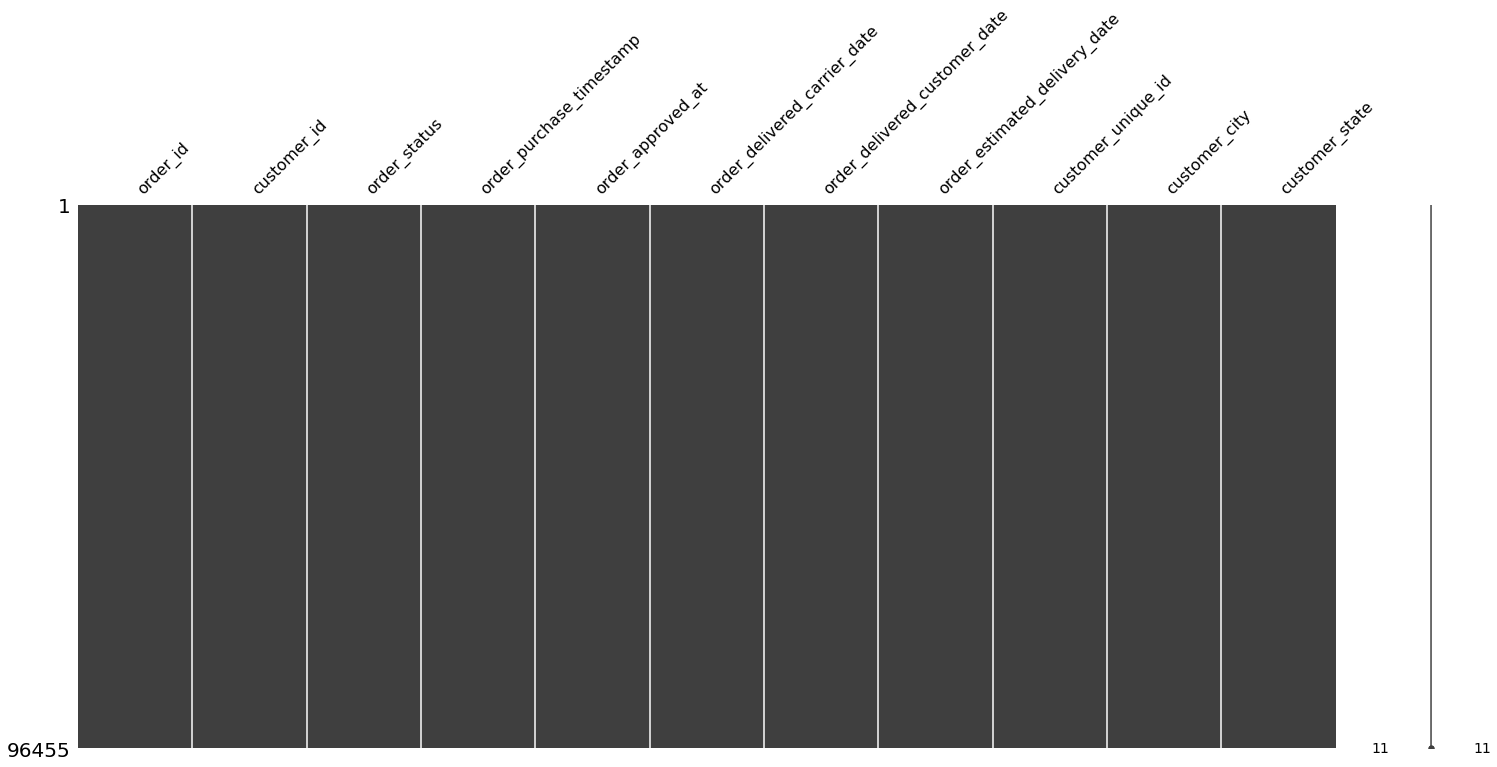

In [88]:
mn.matrix(df_to_cluster)

In [89]:
df_to_cluster.isnull().sum()/len(df_orders)*100

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
customer_unique_id               0.0
customer_city                    0.0
customer_state                   0.0
dtype: float64

### Combining with reviews

In [90]:
df_to_cluster = pd.merge(df_to_cluster, df_reviews, how = 'left', on = 'order_id')
df_to_cluster.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,8d5266042046a06655c8db133d120ba5,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5


<AxesSubplot:>

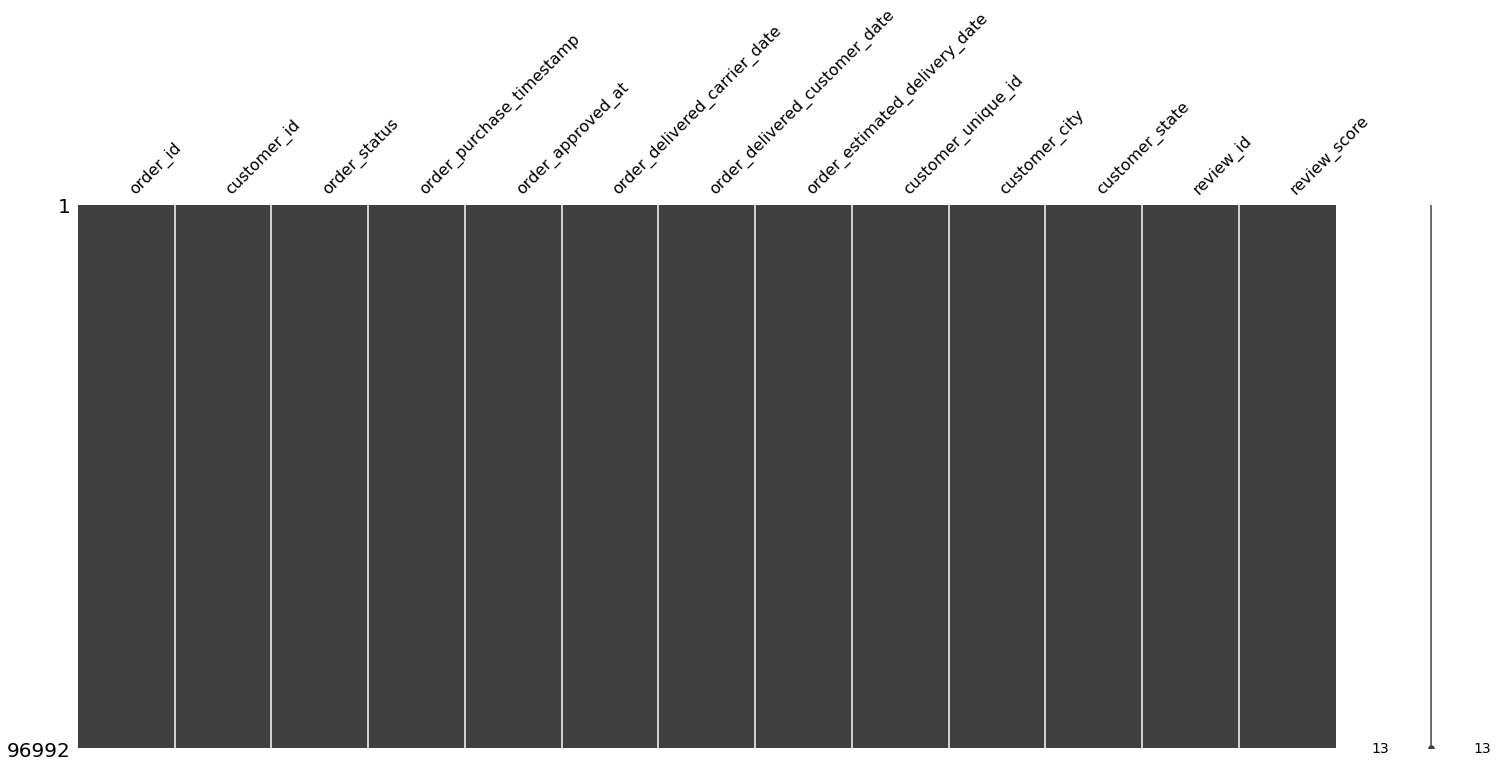

In [91]:
mn.matrix(df_to_cluster)

In [92]:
df_to_cluster.shape

(96992, 13)

In [99]:
df_to_cluster[df_to_cluster['order_id'].duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,review_id,review_score
392,ac7a92560a9e99f0a0ab4988102f491b,6abf781c5304890987047e9aa239caa8,delivered,2018-03-04 15:58:09,2018-03-04 16:10:35,2018-03-06 17:14:59,2018-03-22 23:44:33,2018-03-23 00:00:00,a176838867d89ed62981cdf02b7ca3e1,londrina,PR,5ac791169055b4994a395a442e3956f6,1
539,7845a2492ab1b4f2cf3d56c7b8da1446,386e96046ce0e77e5c9a9a4e818da93c,delivered,2018-01-18 12:35:45,2018-01-18 12:56:40,2018-01-18 23:42:44,2018-01-23 21:51:48,2018-02-09 00:00:00,1175e95fb47ddff9de6b2b06188f7e0d,curitiba,PR,8566d94f7bf3bedbb4ca6a29725fc382,5
650,acbe07f22f29ad7e5a78f30008cc6ec7,b4afeb58ac51bc903c5362286c6a5cfe,delivered,2017-11-18 14:33:04,2017-11-18 19:06:16,2017-11-27 18:34:31,2017-11-29 17:58:43,2017-12-05 00:00:00,6457b2cb5462c1217e8e6d36b0ff39d2,sao paulo,SP,a3c3bd7b9583c15aa8b72bbb94e8744d,5
793,c761a8b74f1e876bc5efc4186f720e27,a8ed087e25b26fb64cbb99033eb243a7,delivered,2017-04-03 19:07:32,2017-04-03 19:22:45,2017-04-05 12:42:51,2017-04-11 14:25:21,2017-05-15 00:00:00,3702265e16e5246cff7462ea675f6d90,cachoeiro de itapemirim,ES,8edd42a7c561e11de943594bfae347e5,1
1067,5e4c365dd3cf7769a88981f408d069d3,15f7712bb12fe27068e5353d14503653,delivered,2017-11-21 21:31:09,2017-11-23 02:47:29,2017-11-28 23:33:04,2017-12-23 16:13:34,2017-12-12 00:00:00,7e1681f9bb31800364869a2cdbe289db,rio de janeiro,RJ,6b53b5ee362ec284dcaca9a653645b58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96413,66f943fd426ac8716ef6b6b97ace8bd8,592ef413ebc8f70a779b9282d2ea6020,delivered,2018-04-19 08:26:03,2018-04-19 08:35:19,2018-04-27 10:56:00,2018-05-04 19:51:06,2018-05-09 00:00:00,d6df1c8cb71c59d9b52d828dc6d0f5b3,brasilia,DF,090aa2980b0aea78cd1ae73447d7d55b,4
96585,76de574e14e58baded25a12dce8075c1,3dc99b2fcf41c0898cfc7f38c2fefe5e,delivered,2017-06-18 10:26:33,2017-06-18 10:42:57,2017-06-19 13:45:40,2017-06-22 16:04:05,2017-07-11 00:00:00,970e5961383615662043afa2d9c68802,belo horizonte,MG,0234abe22674d1798d6c3f95aea9033b,5
96610,2fcdb0c004a2a538d3dd724ea76916bd,cf826be53b1fe4a39bc33c7f5f827835,delivered,2017-11-22 11:39:00,2017-11-22 11:49:05,2017-11-23 22:58:51,2017-12-15 00:23:25,2017-12-18 00:00:00,d92462d83762d5e5c112bccc344119e6,grajau,MA,4c4bc2df56b20a1bc3749622240a427f,5
96644,dbfa3d8c05cc5d84083fc259a9feb5bc,92fc29e76e4da7c1b189ab092d4c3756,delivered,2018-01-04 22:57:14,2018-01-06 02:08:45,2018-01-13 00:51:54,2018-01-22 21:16:37,2018-02-01 00:00:00,8901b2526349d372dd0bdf8d77af656d,dourados,MS,3052a79d76a1932ff98c990a59230f8d,5


In [100]:
df_to_cluster[df_to_cluster['order_id'] == '66f943fd426ac8716ef6b6b97ace8bd8']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,review_id,review_score
96412,66f943fd426ac8716ef6b6b97ace8bd8,592ef413ebc8f70a779b9282d2ea6020,delivered,2018-04-19 08:26:03,2018-04-19 08:35:19,2018-04-27 10:56:00,2018-05-04 19:51:06,2018-05-09 00:00:00,d6df1c8cb71c59d9b52d828dc6d0f5b3,brasilia,DF,832acec9bbf4efe65c3fb6423d8b4ed7,4
96413,66f943fd426ac8716ef6b6b97ace8bd8,592ef413ebc8f70a779b9282d2ea6020,delivered,2018-04-19 08:26:03,2018-04-19 08:35:19,2018-04-27 10:56:00,2018-05-04 19:51:06,2018-05-09 00:00:00,d6df1c8cb71c59d9b52d828dc6d0f5b3,brasilia,DF,090aa2980b0aea78cd1ae73447d7d55b,4


### Combining with items

In [73]:
df_to_cluster = pd.merge(df_to_cluster, items, how = 'left', on = 'order_id')
df_to_cluster.shape

(100762, 18)

In [74]:
df_to_cluster.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,review_id,review_score,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


<AxesSubplot:>

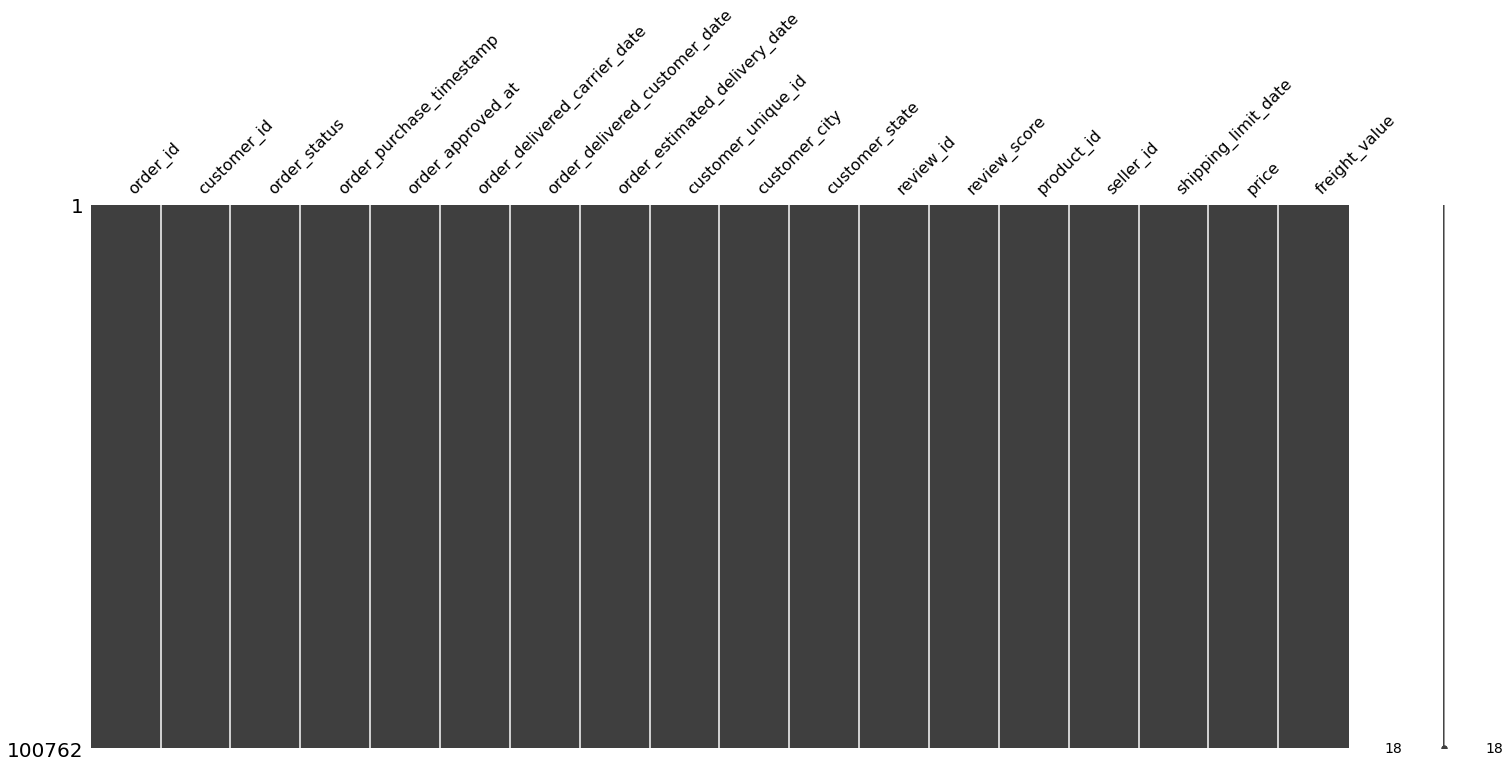

In [75]:
mn.matrix(df_to_cluster)

### Combining with products

In [78]:
df_to_cluster = pd.merge(df_to_cluster, df_products, how = 'left', on = 'product_id')
df_to_cluster.shape

(100762, 19)

In [79]:
df_to_cluster.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,review_id,review_score,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria


### Combining with payments

In [81]:
df_to_cluster = pd.merge(df_to_cluster, df_payments, how = 'left', on = 'order_id')
df_to_cluster.shape

(105292, 23)

In [82]:
df_to_cluster.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,...,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,1.0,credit_card,3.0,179.12


<AxesSubplot:>

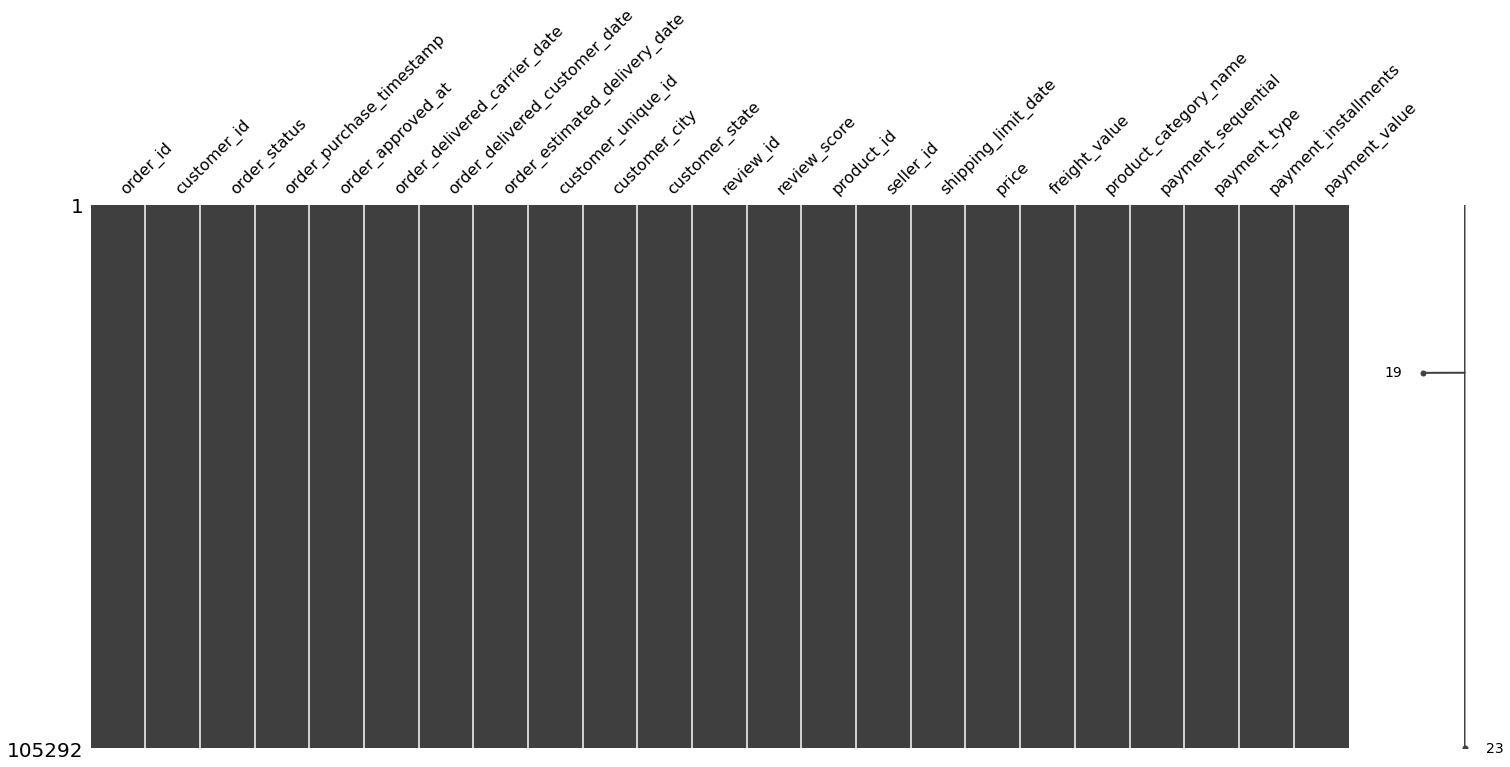

In [83]:
#checking missing values
mn.matrix(df_to_cluster)

In [84]:
df_to_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105292 entries, 0 to 105291
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       105292 non-null  object 
 1   customer_id                    105292 non-null  object 
 2   order_status                   105292 non-null  object 
 3   order_purchase_timestamp       105292 non-null  object 
 4   order_approved_at              105292 non-null  object 
 5   order_delivered_carrier_date   105292 non-null  object 
 6   order_delivered_customer_date  105292 non-null  object 
 7   order_estimated_delivery_date  105292 non-null  object 
 8   customer_unique_id             105292 non-null  object 
 9   customer_city                  105292 non-null  object 
 10  customer_state                 105292 non-null  object 
 11  review_id                      105292 non-null  object 
 12  review_score                  

In [85]:
df_to_cluster.dropna(axis = 0, inplace = True)

In [86]:
df_to_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105291 entries, 0 to 105291
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       105291 non-null  object 
 1   customer_id                    105291 non-null  object 
 2   order_status                   105291 non-null  object 
 3   order_purchase_timestamp       105291 non-null  object 
 4   order_approved_at              105291 non-null  object 
 5   order_delivered_carrier_date   105291 non-null  object 
 6   order_delivered_customer_date  105291 non-null  object 
 7   order_estimated_delivery_date  105291 non-null  object 
 8   customer_unique_id             105291 non-null  object 
 9   customer_city                  105291 non-null  object 
 10  customer_state                 105291 non-null  object 
 11  review_id                      105291 non-null  object 
 12  review_score                  

### Combining with Sellers

In [88]:
df_to_cluster = pd.merge(df_to_cluster, df_sellers, how = 'left', on = 'seller_id')
df_to_cluster.shape

(105291, 24)

In [90]:
df_to_cluster.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_city', 'customer_state', 'review_id',
       'review_score', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'seller_state'],
      dtype='object')

In [91]:
cols = ['order_id', 'customer_id', 'order_status', 'customer_unique_id', 'review_id',
       'product_id', 'seller_id', 'shipping_limit_date' ]

df_to_cluster.drop(columns=cols, axis = 1, inplace = True)
df_to_cluster.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,review_score,price,freight_value,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,seller_state
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,sao paulo,SP,4,29.99,8.72,utilidades_domesticas,1.0,credit_card,1.0,18.12,SP
1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,sao paulo,SP,4,29.99,8.72,utilidades_domesticas,3.0,voucher,1.0,2.00,SP
2,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,sao paulo,SP,4,29.99,8.72,utilidades_domesticas,2.0,voucher,1.0,18.59,SP
3,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,barreiras,BA,4,118.70,22.76,perfumaria,1.0,boleto,1.0,141.46,SP
4,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,vianopolis,GO,5,159.90,19.22,automotivo,1.0,credit_card,3.0,179.12,SP


In [92]:
df_to_cluster.columns

Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_city', 'customer_state',
       'review_score', 'price', 'freight_value', 'product_category_name',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_state'],
      dtype='object')

In [93]:
#save dataframe to csv
df_to_cluster.to_csv('../datasets/data_to_clustering.csv', index=False)